<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Данные-обучающей-выборки" data-toc-modified-id="Данные-обучающей-выборки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Данные обучающей выборки</a></span></li><li><span><a href="#Данные-тестовой-выборки" data-toc-modified-id="Данные-тестовой-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Данные тестовой выборки</a></span></li><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#Расчет-recovery" data-toc-modified-id="Расчет-recovery-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Расчет recovery</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Импорт библиотек


In [1]:
# импортируем необходимые библиотеки

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import defaultdict
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

In [2]:
# загрузим файлы

train_df = pd.read_csv("/datasets/gold_recovery_train_new.csv") 
test_df = pd.read_csv("/datasets/gold_recovery_test_new.csv")
full_df = pd.read_csv("/datasets/gold_recovery_full_new.csv")

### Данные обучающей выборки

In [3]:
# посмотрим на данные
train_df

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


### Данные тестовой выборки

In [4]:
# посмотрим на данные
test_df

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


### Исходные данные 

In [5]:
# посмотрим на данные
full_df 

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


### Расчет recovery

Предварительно удалим пропуски из столбцов со значением NaN.

In [6]:
train_df.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au',
                                   'rougher.output.tail_au','rougher.output.recovery'], inplace=True)

In [7]:
# псевдослучайность для всех используемых в проекте алгоритмов
rnd_state = 12345

In [8]:

C = train_df['rougher.output.concentrate_au']
F = train_df['rougher.input.feed_au']
T = train_df['rougher.output.tail_au']

train_df['rougher.output.recovery_calc'] = C * (F - T) * 100 / (F * (C - T))

def mae(target_recovery, calculated_recovery):
    return abs(target_recovery - calculated_recovery).sum() / len(target_recovery)

target_recovery = train_df['rougher.output.recovery']
calculated_recovery = train_df['rougher.output.recovery_calc']

mae(target_recovery, calculated_recovery)

1.1131451184435918e-14

Средняя абсолютная ошибка (MAE) очень мала - это значит, что расчетное значение rougher.output.recovery совпадает с данными из столбца, считаем что recovery посчитан верно.

In [9]:
train_df.drop('rougher.output.recovery_calc', axis=1, inplace=True)

In [10]:
# отсутствующие столбцы в test_df
missing_columns = list(set(train_df.columns) - set(test_df.columns))
missing_columns

['rougher.output.recovery',
 'rougher.output.tail_sol',
 'final.output.tail_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.tail_pb',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.concentrate_au',
 'final.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.tail_ag',
 'rougher.output.tail_au',
 'final.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_sol',
 'secondary_cleaner.output.tail_au',
 'final.output.recovery',
 'rougher.output.tail_ag',
 'final.output.concentrate_pb',
 'final.output.tail_au',
 'rougher.output.concentrate_ag',
 'secondary_cleaner.output.tail_pb',
 'final.output.concentrate_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.concentrate_au',
 'r

В тестовой выборке пропущено 34 признака. Большинство относятся к параметрам продукта output, это целевые признаки, а также к расчетным характеристикам calculation для этапа rougher. Эти признаки недоступны, так как их невозможно получить/измерить во время выполнения технологического процесса.

### Предобработка данных

In [11]:
# 
datasets = [train_df, test_df, full_df]
for dataset in datasets:
    print("Shape:", dataset.shape)
    print("NA's", dataset.isna().sum().sum())
    print("Duplicates:", dataset.duplicated().sum())
    print("--------------------------------------")
    dataset["date"] = pd.to_datetime(dataset["date"]) # приведем к нужному формату дату

Shape: (14149, 87)
NA's 4100
Duplicates: 0
--------------------------------------
Shape: (5290, 53)
NA's 90
Duplicates: 0
--------------------------------------
Shape: (19439, 87)
NA's 4481
Duplicates: 0
--------------------------------------


In [12]:
# проведем чистку пропущенных значений обучающей выборке
train_df = train_df.dropna().copy()
train_df.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [13]:
# проведем чистку пропущенных значений тестовой выборке
test_df = test_df.dropna().copy()
test_df.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Выделим столбцы из тестовой выборки, по которым будет обучаться модель. Столбец data не несет смысла для обучающей модели. Для предсказания rougher.output.recovery будут использоватся данные из стобцов этапа rougher. Для вычисления final.output.recovery будут использованы все столбцы из тестовой выборки.

In [14]:
features_columns = test_df.columns[1:]
rougher_features_columns = set(features_columns[12:34])
final_features_columns = set(features_columns)
print(rougher_features_columns)
print()
print(final_features_columns)

{'rougher.state.floatbank10_d_level', 'rougher.input.feed_ag', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_d_air', 'rougher.input.feed_size', 'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_b_level', 'rougher.input.feed_rate', 'rougher.input.floatbank10_sulfate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_c_air', 'rougher.input.feed_sol', 'rougher.input.feed_pb', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_f_level', 'rougher.input.floatbank11_xanthate', 'rougher.input.feed_au', 'rougher.state.floatbank10_a_level', 'rougher.input.floatbank11_sulfate'}

{'secondary_cleaner.state.floatbank4_b_air', 'primary_cleaner.state.floatbank8_d_air', 'rougher.state.floatbank10_d_level', 'primary_cleaner.state.floatbank8_b_air', 'secondary_cleaner.state.floatbank5_a_air', 'primary_cleaner.input.feed_size', 'rougher.input.f

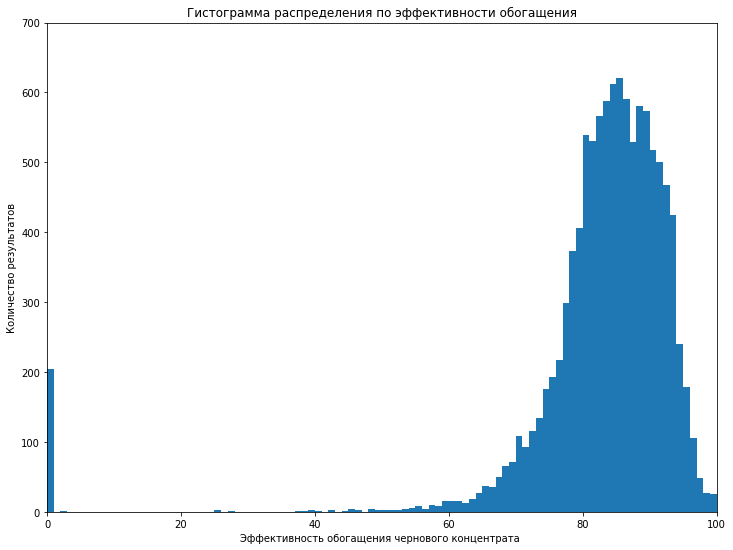

In [15]:
plt.figure(figsize=[12,9])

plt.hist(train_df['rougher.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 700])

plt.xlabel("Эффективность обогащения чернового концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

In [16]:
# изучим нулевые значения в столбце rougher.output.recovery
train_df[train_df['rougher.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
50,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
51,2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
759,2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


In [17]:
train_df[train_df['rougher.output.concentrate_au'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
50,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
51,2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
759,2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


In [18]:
# в данных нет информации о этапе rougher, удалим эти значения, так как они могут исказить данные
train_df = train_df.drop(train_df[train_df['rougher.output.recovery'] == 0].index)
train_df[train_df['rougher.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


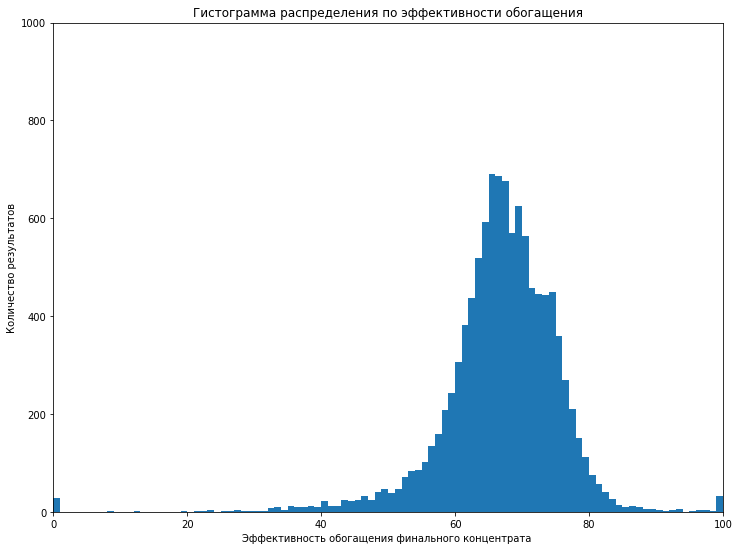

In [19]:
plt.figure(figsize=[12,9])

plt.hist(train_df['final.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 1000])

plt.xlabel("Эффективность обогащения финального концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

In [20]:
train_df[train_df['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
644,2016-02-13 11:00:00,0.0,0.0,0.0,0.0,0.0,8.894029,0.843584,15.417342,1.779052,...,21.991762,-399.587122,21.988937,-401.366408,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808
1193,2016-03-11 10:00:00,0.0,0.0,0.0,0.0,0.0,10.817313,1.462800,16.407607,2.984504,...,11.979352,-453.431061,12.003445,-450.179844,11.982937,-449.856468,9.927727,-450.521700,19.971682,-500.685521
1194,2016-03-11 11:00:00,0.0,0.0,0.0,0.0,0.0,10.436792,1.207636,17.800392,2.747294,...,12.034636,-446.590944,12.130405,-449.684812,11.844983,-450.881424,9.916784,-449.542871,20.004767,-500.137068
1195,2016-03-11 12:00:00,0.0,0.0,0.0,0.0,0.0,10.637073,1.405778,17.195897,2.791440,...,12.016716,-496.613149,12.055535,-496.908551,12.091144,-496.404140,9.976074,-496.783155,19.921634,-500.769011
1196,2016-03-11 13:00:00,0.0,0.0,0.0,0.0,0.0,10.530320,1.461550,17.556860,2.682127,...,11.993898,-500.427824,12.083824,-500.162537,12.078809,-499.903743,10.075259,-499.540325,20.039788,-499.932405


In [21]:
train_df = train_df.drop(train_df[train_df['final.output.recovery'] == 0].index)
train_df[train_df['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10784 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                10784 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         10784 non-null  float64       
 2   final.output.concentrate_pb                         10784 non-null  float64       
 3   final.output.concentrate_sol                        10784 non-null  float64       
 4   final.output.concentrate_au                         10784 non-null  float64       
 5   final.output.recovery                               10784 non-null  float64       
 6   final.output.tail_ag                                10784 non-null  float64       
 7   final.output.tail_pb                                10784 non-null  float64       
 8   final.

In [23]:
# проверим есть ли нулевые значения в primary_cleaner.output и secondary_cleaner.output
train_df[train_df['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count()

109

In [24]:
train_df[train_df['secondary_cleaner.output.tail_au'] < 1]['secondary_cleaner.output.tail_au'].count()

426

<div style="border:solid green 2px; padding: 20px">

### Вывод
    
Данные загружены и изучены.

В ашем распоряжении сырые данные: их просто выгрузили из хранилища. Данные находятся в трёх файлах:

- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные. 

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

По данным этапам тоже присутвуют нулевые значения. Но так как они не являются целью модели и не входят в список столбцов обучающей модели, оставим их без изменения. Данные готовы к дальнейшему анализу.
    
</div>     

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

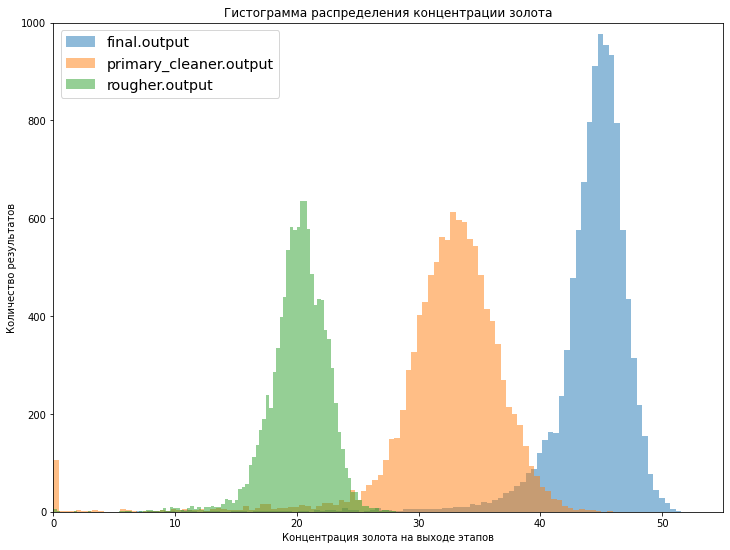

In [25]:
plt.figure(figsize=[12,9])

plt.hist(train_df['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
plt.hist(train_df['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(train_df['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 55])
plt.ylim([0, 1000])

plt.xlabel("Концентрация золота на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации золота")
plt.show()

Концентрация золота повышается с каждым этапом. Цель флотации и очисток увеличить концентрацию золота.

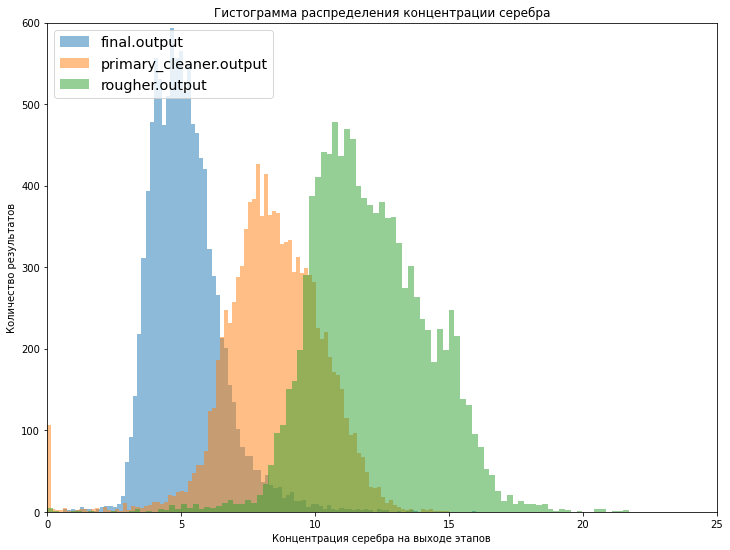

In [26]:
plt.figure(figsize=[12,9])

plt.hist(train_df['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=.5)
plt.hist(train_df['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(train_df['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 600])

plt.xlabel("Концентрация серебра на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации серебра")
plt.show()

Конецентрация серебра понижается с каждым шагом очистки. Так как основным благородным металом является золото, то остальные металлы и соединения должны быть отфильтрованы.

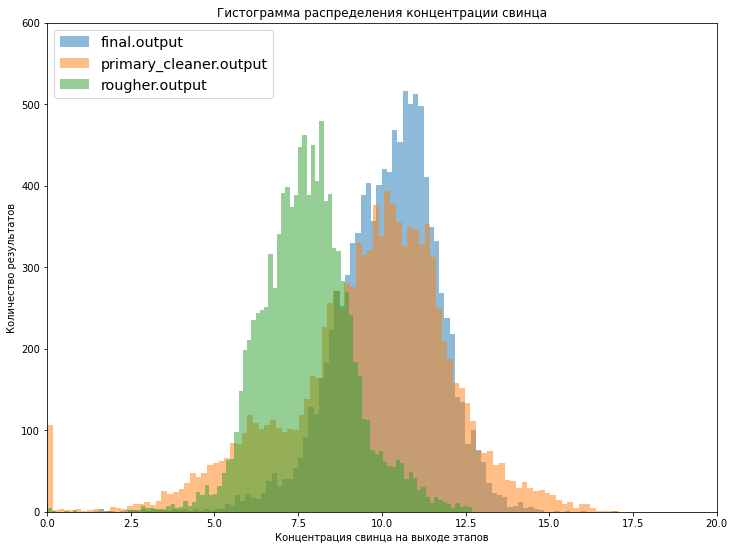

In [27]:
plt.figure(figsize=[12,9])

plt.hist(train_df['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(train_df['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(train_df['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 600])

plt.xlabel("Концентрация свинца на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации свинца")
plt.show()

Концентрация свинца повышается с этапа rougher до primary_cleaner. И потом усредняется. Это связано с химическим процесами очищения золота.

### Распределение размеров гранул сырья на обучающей и тестовой выборках

Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

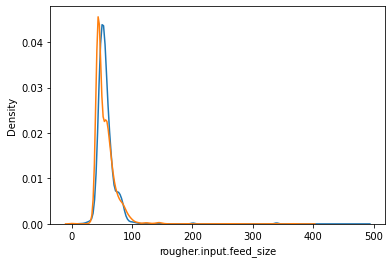

In [28]:
sns.kdeplot(data=train_df['rougher.input.feed_size'].dropna(), label='data_train')
sns.kdeplot(data=test_df['rougher.input.feed_size'].dropna(), label='test_df')

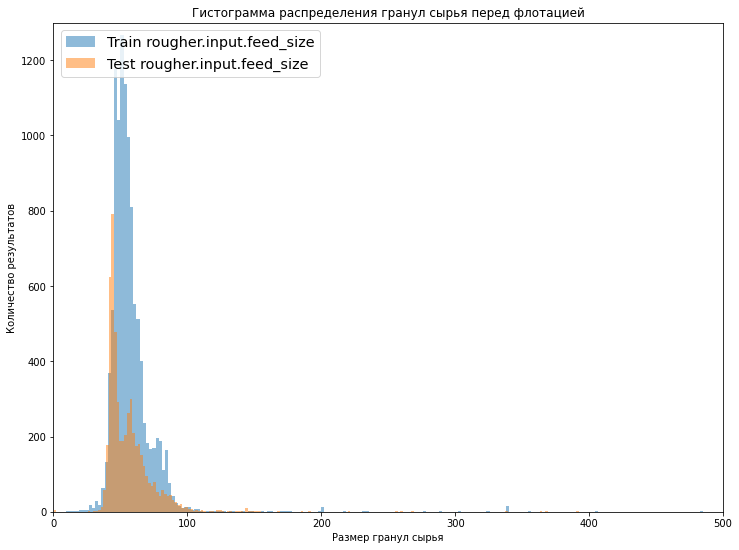

In [29]:
plt.figure(figsize=[12,9])

plt.hist(train_df['rougher.input.feed_size'], bins=200, label = 'Train rougher.input.feed_size', alpha=.5)
plt.hist(test_df['rougher.input.feed_size'], bins=200, label = 'Test rougher.input.feed_size', alpha=.5)

plt.xlim([0, 500])
plt.ylim([0, 1300])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед флотацией")
plt.show()

Распределение гранул до флотации похоже на нормальное со смещением влево как в обучающей, так и в тестовой выбрке. Существует много выбросов после 100.

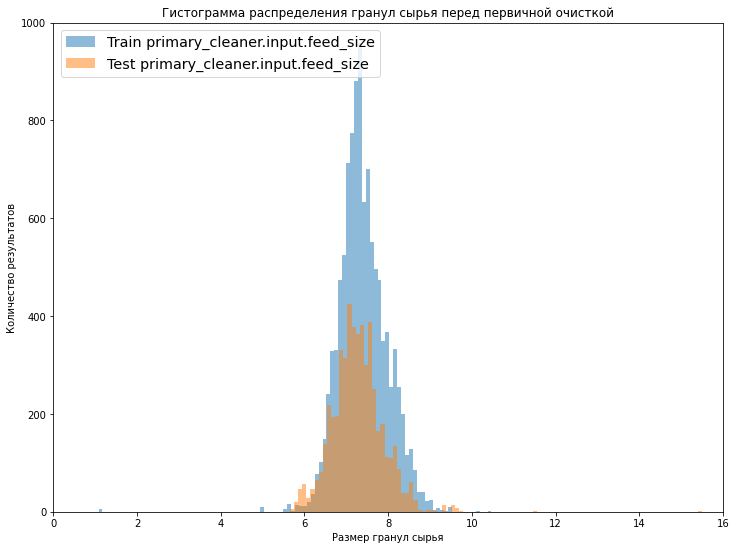

In [30]:
plt.figure(figsize=[12,9])

plt.hist(train_df['primary_cleaner.input.feed_size'], bins=100, label = 'Train primary_cleaner.input.feed_size', alpha=.5)
plt.hist(test_df['primary_cleaner.input.feed_size'], bins=100, label = 'Test primary_cleaner.input.feed_size', alpha=.5)

plt.xlim([0, 16])
plt.ylim([0, 1000])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед первичной очисткой")
plt.show()

Размеры гранул перед первичной очисткой обладают нормальным распределением.

In [31]:
# подготовим столбцы с финальными концентрациями в обучающей выборке
final_output_concentrate_sum_train = (train_df['final.output.concentrate_au'] + 
                                      train_df['final.output.concentrate_ag'] + 
                                      train_df['final.output.concentrate_pb'] +
                                      train_df['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (train_df['primary_cleaner.output.concentrate_au'] + 
                                                train_df['primary_cleaner.output.concentrate_ag'] + 
                                                train_df['primary_cleaner.output.concentrate_pb'] +
                                                train_df['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum_train = (train_df['rougher.output.concentrate_au'] + 
                                        train_df['rougher.output.concentrate_ag'] + 
                                        train_df['rougher.output.concentrate_pb'] +
                                        train_df['rougher.output.concentrate_sol'])

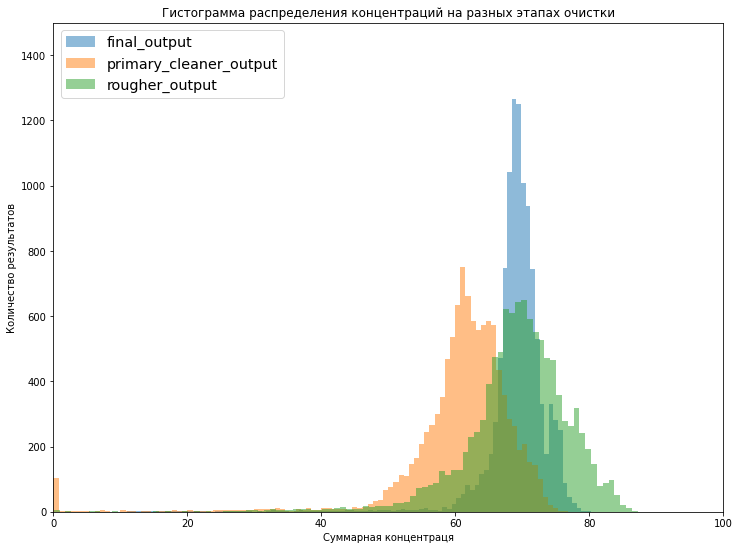

In [32]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 1500])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

По графику видно, что из аномалий много значений в 0. На этапе предобрабоки были найдены строки с нулевыми значениями в primary_cleaner.output. Эти же строки показывают суммарную концентрацию, равную 0. Соответственно они являются аномалией. Удалим их.

In [33]:
train_df = train_df.drop(train_df[train_df['primary_cleaner.output.concentrate_au'] == 0].index)
train_df[train_df['primary_cleaner.output.concentrate_au'] == 0].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


<div style="border:solid green 2px; padding: 20px">
    
### Вывод
    
В результате анализа были изучены:

- Концетрации основных веществ на разных этапах очистки.
- Размер гранул тестовой и обучающей выборки.
- Суммарная концентрация веществ.

Аномалии были удалены. Данные готовы к обучению.
    
</div>     

## Модель

In [34]:
# создадим разделение признаков для предсказания rougher.output.recovery и final.output.recovery

# подготовка признаков для final.output.recovery
columns_to_delete = set(train_df.columns) - final_features_columns
print(columns_to_delete)
train_features_final = train_df.drop(columns_to_delete, axis=1)
print()
print(train_features_final.columns)

# проверка вхождения всех столбцов из feateures в столбцах тестовой выборки
print(set(train_features_final.columns) - set(test_df.columns))

# подготовка признаков для rougher.output.recovery
columns_to_delete = set(train_features_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_rougher = train_features_final.drop(columns_to_delete, axis=1)
print()
print(train_features_rougher.columns)

{'rougher.output.recovery', 'rougher.output.tail_sol', 'final.output.tail_pb', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.tail_pb', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_ag', 'rougher.output.tail_au', 'final.output.concentrate_au', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_sol', 'secondary_cleaner.output.tail_au', 'final.output.recovery', 'rougher.output.tail_ag', 'final.output.concentrate_pb', 'final.output.tail_au', 'rougher.output.concentrate_ag', 'secondary_cleaner.output.tail_pb', 'date', 'final.output.concentrate_sol', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.output.concentrate_au', 'rougher.output.tail_p

In [35]:
train_features_rougher.shape

(10737, 22)

In [36]:
# подготовим целевой признак
train_target_final = train_df['final.output.recovery']
train_target_rougher = train_df['rougher.output.recovery']

In [37]:
# подготовим признаки тестовой выборки
test_features = test_df.drop('date', axis=1)
test_features.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [38]:
test_features.shape

(5229, 52)

In [39]:
test_features_final = test_features
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
print(columns_to_delete)
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

{'secondary_cleaner.state.floatbank4_b_air', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_b_air', 'secondary_cleaner.state.floatbank5_a_air', 'primary_cleaner.input.feed_size', 'secondary_cleaner.state.floatbank3_b_level', 'primary_cleaner.state.floatbank8_b_level', 'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_a_air', 'primary_cleaner.input.xanthate', 'primary_cleaner.input.sulfate', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank2_a_air', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'secondary_cleaner.state.floatbank2_b_level', 'primary_cleaner.input.depressant', 'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank3_b_air', 'primary_cleaner.state.floatbank8_c_level', 'secondary_cleaner.st

In [40]:
test_features_rougher.shape

(5229, 22)

In [41]:
# функция вычисления
def sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted):
    n = rougher_recovery_real.shape[0]
    rougher_sMAPE = ((2*abs(rougher_recovery_real - rougher_recovery_predicted)/
                     (abs(rougher_recovery_real) + abs(rougher_recovery_predicted))).sum() * 100 / n)
    final_sMAPE = ((2*abs(final_recovery_real - final_recovery_predicted)/
                     (abs(final_recovery_real) + abs(final_recovery_predicted))).sum() * 100 / n)
    return rougher_sMAPE * 0.25 + final_sMAPE * 0.75

Перед нами стоит задача регресии. Выберем следующие модели для обучения:

- Линейная регрессия
- Полиноминальная регрессия. Применется на линейной регрессии с подготовленными признаками
- Регрессия Ridge
- DecisionTreeRegressor

Выполним поиск лучшей модели для предсказаний

In [42]:
%%time

regressor = LinearRegression()
print('Mean R2 from CV of LinearRegression =', cross_val_score(regressor, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of LinearRegression =', cross_val_score(regressor, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error'))

Mean R2 from CV of LinearRegression = -0.1945534942868992
Mean MAE from CV of LinearRegression = [-6.84099134 -4.98462481 -4.91378925 -5.17288221 -7.60692342]
CPU times: user 1.31 s, sys: 1.64 s, total: 2.94 s
Wall time: 2.84 s


Проверим влияние масштаба признаков на качество модели.

In [43]:
%%time

regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
print('Mean R2 from CV of LinearRegression =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of LinearRegression =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error'))

Mean R2 from CV of LinearRegression = -0.19455349428688712
Mean MAE from CV of LinearRegression = [-6.84099134 -4.98462481 -4.91378925 -5.17288221 -7.60692342]
CPU times: user 1.2 s, sys: 1.23 s, total: 2.43 s
Wall time: 2.49 s


Масштаб признаков не влияет.

In [44]:
%%time

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
print('Mean R2 from CV of PolynomialRegression with 2 degree =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of PolynomialRegression with 2 degree =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error'))

Mean R2 from CV of PolynomialRegression with 2 degree = -53.89653174171724
Mean MAE from CV of PolynomialRegression with 2 degree = [-53.14111863 -32.72539989 -33.32419169 -24.15032646 -15.16495041]
CPU times: user 2min 4s, sys: 1min 44s, total: 3min 49s
Wall time: 3min 50s


Для регрессоров Ridge и DecisionTreeRegressor применим метод GridSearchCV. В нем уже вложена кросс-валидация.

In [45]:
%%time

regressor = Ridge()
hyperparams = [{'alpha':[0.1, 1, 10, 100], 'solver':['auto']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['svd']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['cholesky']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['lsqr']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['sparse_cg']}]

scores = ['r2', 'neg_mean_absolute_error']

for score in scores:
    print('# Tuning hyper-parameters for %s' % score)
    print()
    clf = GridSearchCV(regressor, hyperparams, scoring=score)
    clf.fit(train_features_final, train_target_final)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

# Tuning hyper-parameters for r2

Best parameters set found on development set:

{'alpha': 100, 'solver': 'sparse_cg'}

Grid scores on development set:

-0.195 (+/-0.649) for {'alpha': 0.1, 'solver': 'auto'}
-0.194 (+/-0.649) for {'alpha': 1, 'solver': 'auto'}
-0.194 (+/-0.647) for {'alpha': 10, 'solver': 'auto'}
-0.187 (+/-0.628) for {'alpha': 100, 'solver': 'auto'}
-0.195 (+/-0.649) for {'alpha': 0.1, 'solver': 'svd'}
-0.194 (+/-0.649) for {'alpha': 1, 'solver': 'svd'}
-0.194 (+/-0.647) for {'alpha': 10, 'solver': 'svd'}
-0.187 (+/-0.628) for {'alpha': 100, 'solver': 'svd'}
-0.195 (+/-0.649) for {'alpha': 0.1, 'solver': 'cholesky'}
-0.194 (+/-0.649) for {'alpha': 1, 'solver': 'cholesky'}
-0.194 (+/-0.647) for {'alpha': 10, 'solver': 'cholesky'}
-0.187 (+/-0.628) for {'alpha': 100, 'solver': 'cholesky'}
-0.232 (+/-0.371) for {'alpha': 0.1, 'solver': 'lsqr'}
-0.232 (+/-0.371) for {'alpha': 1, 'solver': 'lsqr'}
-0.232 (+/-0.371) for {'alpha': 10, 'solver': 'lsqr'}
-0.232 (+/-0.371) for 

In [46]:
%%time

regressor = DecisionTreeRegressor() 
max_depth_list = [x for x in range(2, 21, 2)]
hyperparams = [{'criterion':['mse'], 'max_depth':max_depth_list, 'random_state':[15062020]},
               {'criterion':['mae'], 'max_depth':max_depth_list, 'random_state':[15062020]}]

print('# Tuning hyper-parameters')
print()
clf = GridSearchCV(regressor, hyperparams)
clf.fit(train_features_final, train_target_final)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'criterion': 'mae', 'max_depth': 2, 'random_state': 15062020}

Grid scores on development set:

-0.235 (+/-0.384) for {'criterion': 'mse', 'max_depth': 2, 'random_state': 15062020}
-0.305 (+/-0.563) for {'criterion': 'mse', 'max_depth': 4, 'random_state': 15062020}
-0.386 (+/-0.637) for {'criterion': 'mse', 'max_depth': 6, 'random_state': 15062020}
-0.597 (+/-0.738) for {'criterion': 'mse', 'max_depth': 8, 'random_state': 15062020}
-1.188 (+/-1.699) for {'criterion': 'mse', 'max_depth': 10, 'random_state': 15062020}
-1.249 (+/-1.220) for {'criterion': 'mse', 'max_depth': 12, 'random_state': 15062020}
-1.512 (+/-1.531) for {'criterion': 'mse', 'max_depth': 14, 'random_state': 15062020}
-1.784 (+/-1.959) for {'criterion': 'mse', 'max_depth': 16, 'random_state': 15062020}
-1.359 (+/-1.359) for {'criterion': 'mse', 'max_depth': 18, 'random_state': 15062020}
-1.739 (+/-1.597) for {'criterion': 'mse', 'max_depth': 20,

In [47]:
# проверим лучшие модели по метрикам на созданной метрике sMAPE, проверим реальные данные
rougher_recovery_real = full_df.loc[test_features_rougher.index,'rougher.output.recovery']
final_recovery_real = full_df.loc[test_features_final.index,'final.output.recovery']
print('Процент пропусков в общей выборке' ,rougher_recovery_real.isna().mean())
print('Процент пропусков в общей выборке',final_recovery_real.isna().mean())

Процент пропусков в общей выборке 0.0
Процент пропусков в общей выборке 0.0


In [48]:
rougher_recovery_real, final_recovery_real

(0       87.107763
 1       86.843261
 2       86.842308
 3       87.226430
 4       86.688794
           ...    
 5285    87.837931
 5286    88.164912
 5287    86.169553
 5288    87.176137
 5289    87.908066
 Name: rougher.output.recovery, Length: 5229, dtype: float64,
 0       70.541216
 1       69.266198
 2       68.116445
 3       68.347543
 4       66.927016
           ...    
 5285    64.948104
 5286    69.161741
 5287    68.821663
 5288    65.828202
 5289    66.985033
 Name: final.output.recovery, Length: 5229, dtype: float64)

В реальной таблице отсутсвуют зачения для выборки. Они будут игнорироваться при расчете sMAPE.

In [49]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для полиноминальной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для регресии Ridge',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=15062020)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

sMAPE для линейной регресии 12.623643558078953
sMAPE для полиноминальной регресии 25.956157619975148
sMAPE для регресии Ridge 12.495231980680684
sMAPE для DecisionTreeRegressor 12.94752083927472
CPU times: user 52.8 s, sys: 30.2 s, total: 1min 23s
Wall time: 1min 23s


In [50]:
# создадим константную модель на медианных значений, изменим код функции для подсчета
median_rougher_recovery = full_df['rougher.output.recovery'].median()
median_final_recovery = full_df['final.output.recovery'].median()

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для медианной константной модели 11.679754848001743


Проведем сокращение тестовой выборки из-за пропущенных значений rougher.output.recovery и final.output.recovery в полном датафрейме. Для вычисления sMAPE длина и индексы всех серий должны быть одинаковы.

In [51]:
rougher_recovery_real.dropna(inplace=True)
print('Количество строк rougher_recovery_real =', rougher_recovery_real.shape[0])
final_recovery_real.dropna(inplace=True)
print('Количество строк final_recovery_real =', final_recovery_real.shape[0])
print('Количество строк test_features_rougher =', test_features_rougher.shape[0])

not_nan_index = set(test_features_rougher.index)
not_nan_index = not_nan_index.intersection(set(final_recovery_real.index), set(rougher_recovery_real.index))
print('Количество индексов с полными данными=', len(not_nan_index))

Количество строк rougher_recovery_real = 5229
Количество строк final_recovery_real = 5229
Количество строк test_features_rougher = 5229
Количество индексов с полными данными= 5229


In [52]:
# преобразуем количество данных тестовой выбоки и рельных так, чтобы не было NaN
rougher_recovery_real = full_df.loc[not_nan_index,'rougher.output.recovery']
final_recovery_real = full_df.loc[not_nan_index,'final.output.recovery']
test_features_rougher = test_features_rougher.loc[not_nan_index,:]
test_features_final = test_features_final.loc[not_nan_index,:]
print('Количество строк test_features_final =', test_features_final.shape[0])

Количество строк test_features_final = 5229


Повторим получение sMAPE на тех же моделях.

In [53]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для полиноминальной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для регресии Ridge',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=15062020)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted)) 

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для линейной регресии 12.623643558078953
sMAPE для полиноминальной регресии 25.956157619975148
sMAPE для регресии Ridge 12.495231980680684
sMAPE для DecisionTreeRegressor 12.94752083927472
sMAPE для медианной константной модели 11.679754848001743
CPU times: user 37.8 s, sys: 8.08 s, total: 45.9 s
Wall time: 45.9 s


Сравним модель Ridge c медианной константной по метрикам R2 и MAE. проверим показания на final_recovery_real.

In [54]:
model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('R2 Ridge model =', r2_score(final_recovery_real, final_recovery_predicted))
print('MAE Ridge model =', mean_absolute_error(final_recovery_real, final_recovery_predicted))
print()

final_median_predict = pd.Series(median_final_recovery, index=not_nan_index)
print('R2 constant model =', r2_score(final_recovery_real, final_median_predict))
print('MAE constant model =', mean_absolute_error(final_recovery_real, final_median_predict))

R2 Ridge model = -0.3229599056699739
MAE Ridge model = 7.512192786317186

R2 constant model = -0.15530194696012067
MAE constant model = 6.706628293443592


Была написана функция для вычисления sMAPE. Каждая модель была изучена на качество с помощью методов кросс-валидации и поиска гипер параметром GridSearchCV. Была отобрана лучшая модель - Ridge. Ее значение sMAPE самое низкое. 

### Вывод

<div style="border:solid green 2px; padding: 20px">
В ходе работы было выполнено:

1. Подготовлены данные.
2. Проведен исследовательский анализ данных.
3. Построена и обучена модель.

Регрессор Ridge показал себя лучше обычной линейной регресии. sMAPE показал 12.52. Если сравнивать с константной моделью, значение проигрывает на 0.85. Другие метрики тоже говорят о том, что константная модель адекватнее выбранной.    
</div>     